# Imports

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import random

# Task 1 - investigation of coefficient C_k

C_i - it's index for i-th node that inform if node has possibilty of beeing part of tight cluster (center of hierarchy, lower lever in hierarch). Nodes with low degree tends to form tight groups (so high clustering index), while high-degree nodes usually act as connector (boss) of theses groups (low clustering index)

In [75]:
# Functions to load networks from csv and txt files
def load_network_csv(path):
    df = pd.read_csv(path)
    edges = list(zip(df['node_1'], df['node_2'])) #creates list of edges
    #creating graph G using networkx
    G = nx.Graph()
    G.add_edges_from(edges)
    return G

def load_network_txt(path):
    edges = [] #list to store edges
    #as it is txt file we have to open it and read line by line
    with open(path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('#'): #the firts line is describing heading
                continue
            u, v = line.split()
            edges.append((int(u), int(v)))
    #creating graph G using networkx
    G = nx.Graph()
    G.add_edges_from(edges)
    return G


#function to copute C_i index 
def compute_C_of_k(G):
    """Return k-values and corresponding average C(k)."""


    clustering = nx.clustering(G)  # ready function to compute the clustering coefficient for nodes (the fraction of possible triangles through the nodes that exist).
    degree = dict(G.degree())      # function to count degree for each node.

    # Group Ci by degree k
    C_by_k = defaultdict(list) #we use defaultdict to create a dictionary where each key implies a degree k and the value is a list of clustering coefficients for nodes with that degree
    for node in G.nodes():
        k = degree[node]
        C_by_k[k].append(clustering[node])

    # Compute averaged C(k)
    ks = sorted(C_by_k.keys())
    Ck = [np.mean(C_by_k[k]) for k in ks]

    return ks, Ck


# --------------------------
# Load Networks
# --------------------------

G1 = load_network_csv("deezer_europe_edges.csv")
G2 = load_network_txt("roadNet-Texas.txt")

ks1, Ck1 = compute_C_of_k(G1)
ks2, Ck2 = compute_C_of_k(G2)



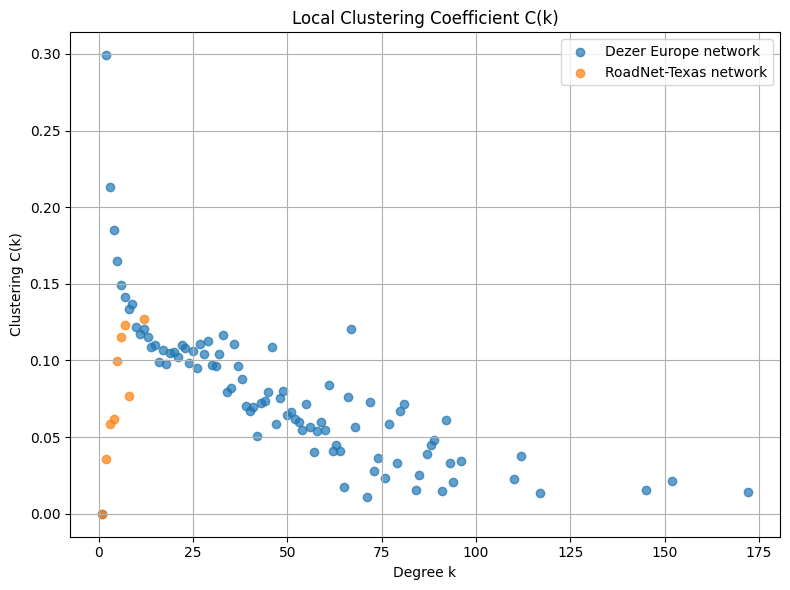

In [76]:
# --------------------------
# Plot
# --------------------------

plt.figure(figsize=(8,6))
plt.scatter(ks1, Ck1, label="Dezer Europe network", alpha=0.7)
plt.scatter(ks2, Ck2, label="RoadNet-Texas network", alpha=0.7)

plt.xlabel("Degree k")
plt.ylabel("Clustering C(k)")
plt.title("Local Clustering Coefficient C(k)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 2

comparision of hierarchical vs non hierarchical networks

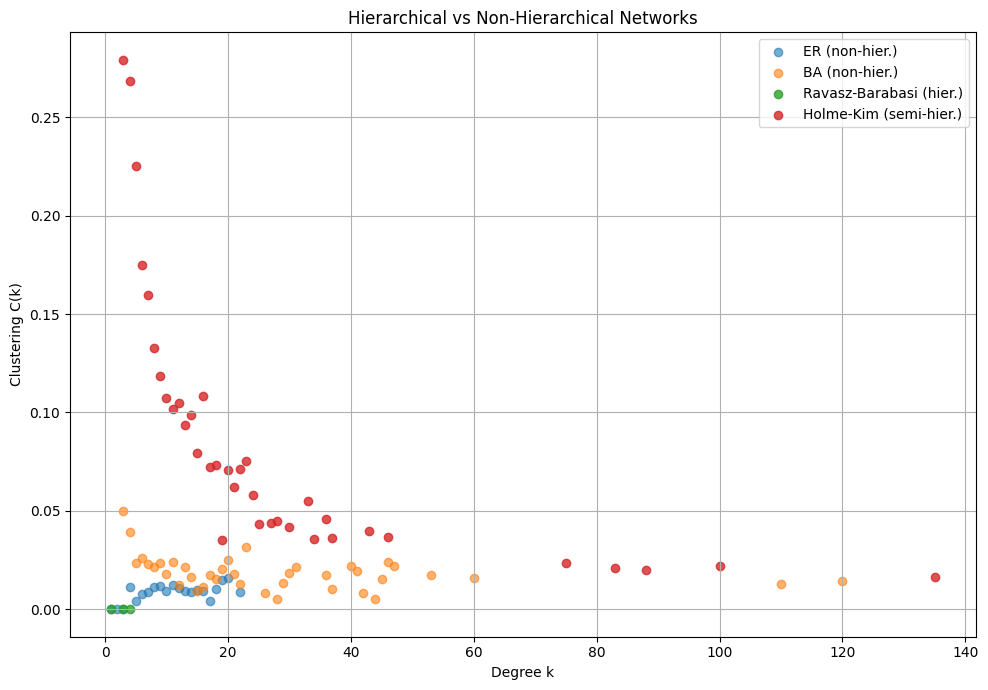

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def compute_C_of_k(G):
    clustering = nx.clustering(G)
    degree = dict(G.degree())

    C_by_k = defaultdict(list)
    for node in G.nodes():
        k = degree[node]
        C_by_k[k].append(clustering[node])

    ks = sorted(C_by_k.keys())
    Ck = [np.mean(C_by_k[k]) for k in ks]
    return ks, Ck


# ============================================================
# NON-HIERARCHICAL NETWORKS
# ============================================================

G_er = nx.erdos_renyi_graph(1000, 0.01)
ks_er, Ck_er = compute_C_of_k(G_er)

G_ba = nx.barabasi_albert_graph(1000, 3)
ks_ba, Ck_ba = compute_C_of_k(G_ba)


# ============================================================
# HIERARCHICAL NETWORKS
# ============================================================


G_hk = nx.powerlaw_cluster_graph(1000, 3, 0.4)
ks_hk, Ck_hk = compute_C_of_k(G_hk)


# ============================================================
# PLOT in NORMAL SCALE as before (show a downward trend)
# ============================================================

plt.figure(figsize=(10,7))

plt.scatter(ks_er, Ck_er, label="ER", alpha=0.6)
plt.scatter(ks_ba, Ck_ba, label="BA", alpha=0.6)
plt.scatter(ks_hk, Ck_hk, label="Holme-Kim", alpha=0.8)

plt.xlabel("Degree k")
plt.ylabel("Clustering C(k)")
plt.title("Hierarchical vs Non-Hierarchical Networks")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Log-Log plot** filttered to remove 0 values 

In [67]:
def filter_positive(ks, Ck):
    ks_f = []
    Ck_f = []
    for k, c in zip(ks, Ck):
        if k > 0 and c > 0:
            ks_f.append(k)
            Ck_f.append(c)
    return ks_f, Ck_f


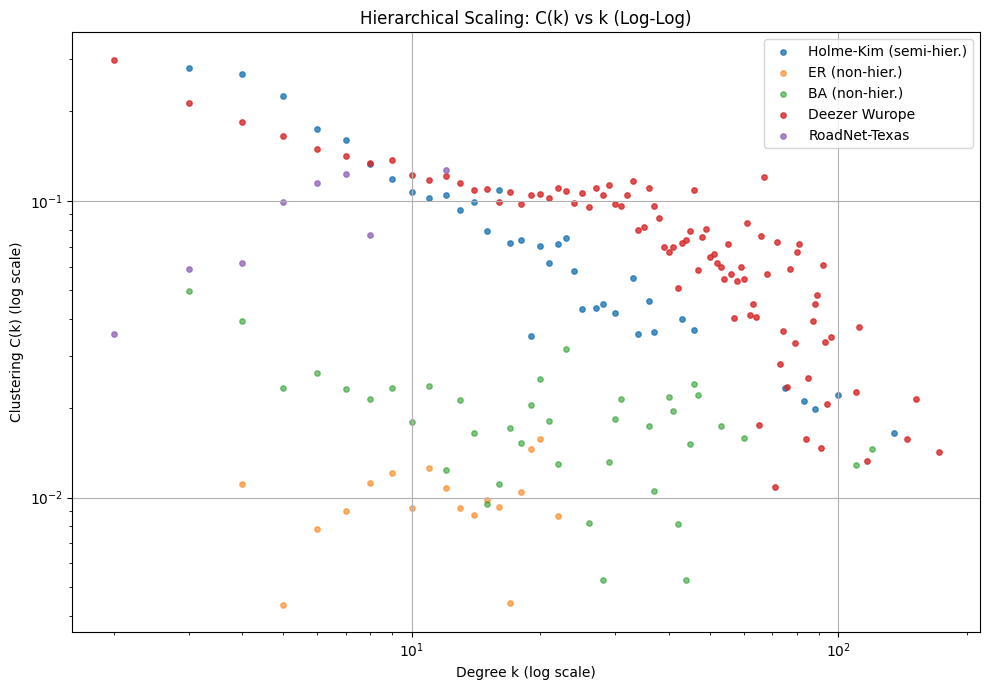

In [ ]:
ks_hk_f, Ck_hk_f = filter_positive(ks_hk, Ck_hk)
ks_er_f, Ck_er_f = filter_positive(ks_er, Ck_er)
ks_ba_f, Ck_ba_f = filter_positive(ks_ba, Ck_ba)
ks1_f, Ck1_f = filter_positive(ks1, Ck1)
ks2_f, Ck2_f = filter_positive(ks2, Ck2)

plt.figure(figsize=(10,7))
plt.scatter(ks_hk_f, Ck_hk_f, s=15, label="Holme-Kim", alpha=0.8)
plt.scatter(ks_er_f, Ck_er_f, s=15, label="ER", alpha=0.6)
plt.scatter(ks_ba_f, Ck_ba_f, s=15, label="BA", alpha=0.6)
plt.scatter(ks1_f, Ck1_f, s=15, label="Deezer Wurope", alpha=0.8) 
plt.scatter(ks2_f, Ck2_f, s=15, label="RoadNet-Texas", alpha=0.8)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Degree k (log scale)")
plt.ylabel("Clustering C(k) (log scale)")
plt.title("Hierarchical Scaling: C(k) vs k (Log-Log)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Plot generated with help of chatGPT:

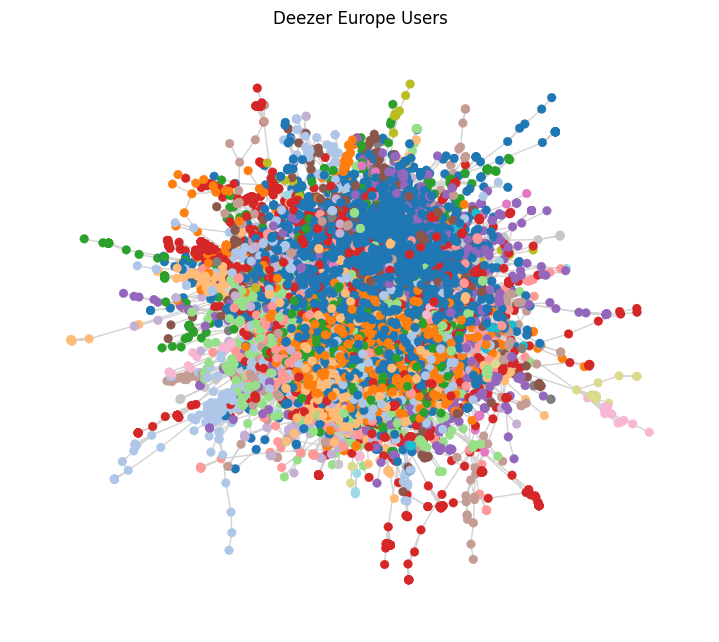

KeyboardInterrupt: 

In [37]:
def plot_network_with_clusters(G, title):
    # Louvain communities
    partition = community.best_partition(G)

    # Convert to color list
    communities = list(set(partition.values()))
    colors = {c: i for i, c in enumerate(communities)}
    node_colors = [colors[partition[n]] for n in G.nodes()]

    plt.figure(figsize=(7, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(
        G, 
        pos,
        node_size=40,
        node_color=node_colors,
        cmap=plt.cm.tab20,
        edge_color="lightgray",
        linewidths=0.2
    )
    plt.title(title)
    plt.axis("off")
    plt.show()

plot_network_with_clusters(G1, "Deezer Europe Users")
plot_network_with_clusters(G2, "Texas roadnet")

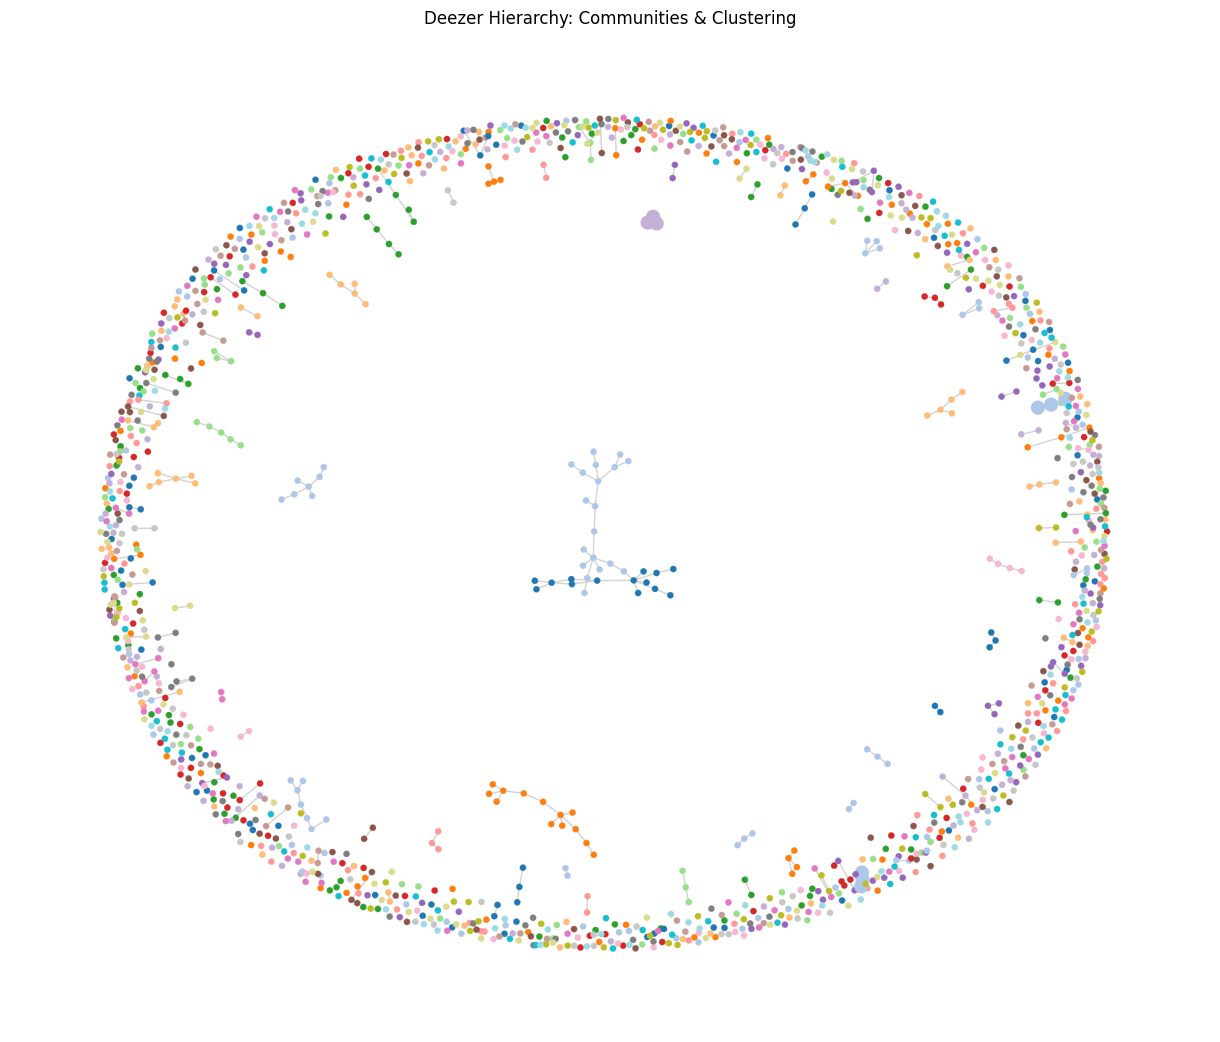

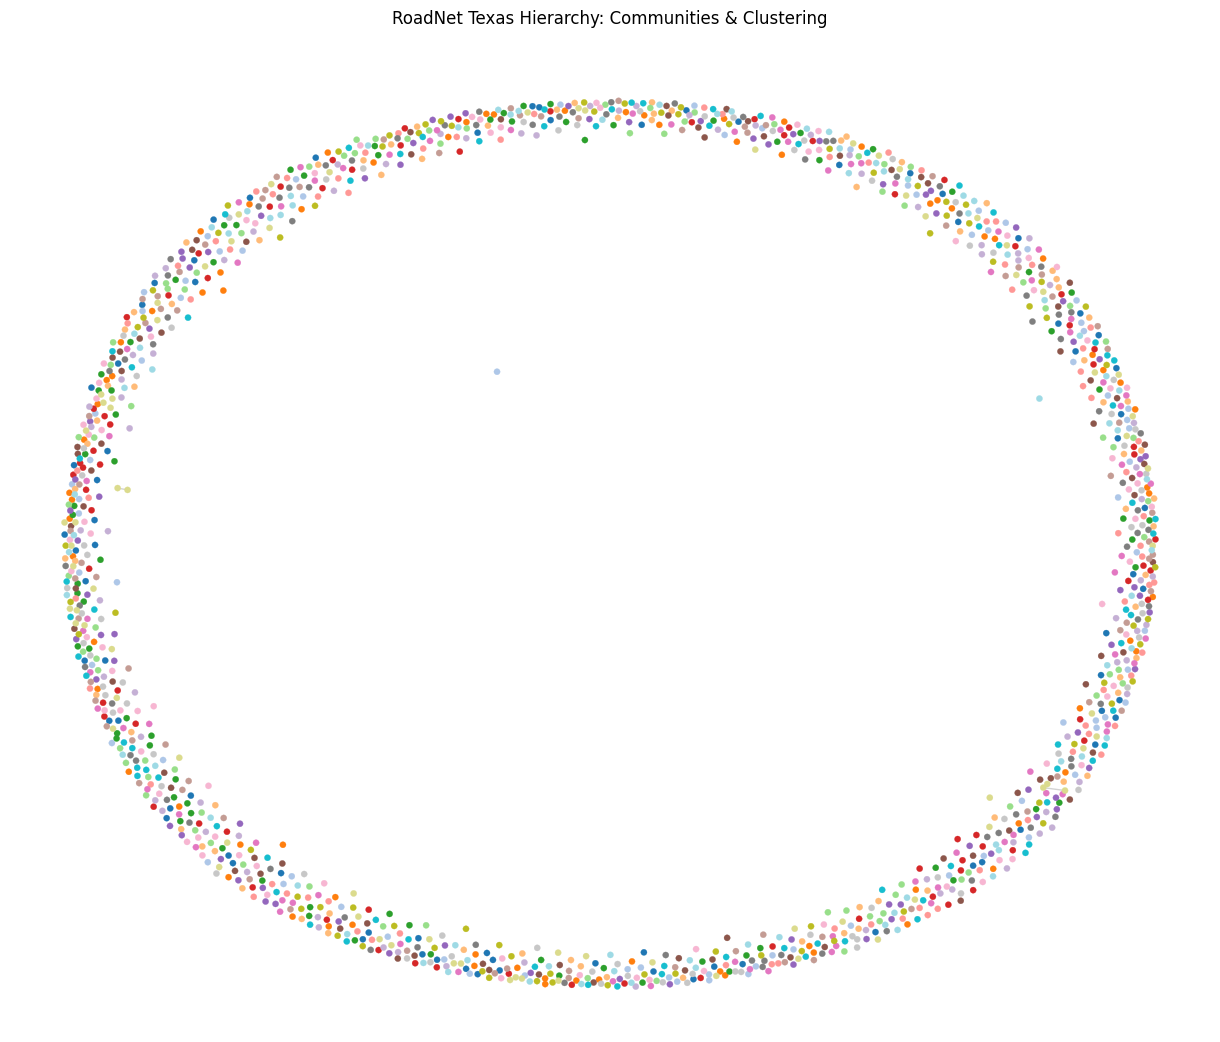

In [47]:
import community
def sample_subgraph(G, max_nodes=1500):
    nodes = random.sample(list(G.nodes()), min(max_nodes, len(G)))
    return G.subgraph(nodes).copy()

# --------------------------
# Compute C(k)
# --------------------------
def compute_C_of_k(G):
    clustering = nx.clustering(G)
    degree = dict(G.degree())
    C_by_k = defaultdict(list)
    for node in G.nodes():
        k = degree[node]
        C_by_k[k].append(clustering[node])
    ks = sorted(C_by_k.keys())
    Ck = [np.mean(C_by_k[k]) for k in ks]
    return ks, Ck

# --------------------------
# Plot Graph with Communities and Clustering
# --------------------------
def plot_graph_hierarchy(G, title="Hierarchical Graph"):
    # 1. Louvain communities → colors
    partition = community.best_partition(G)
    communities = list(set(partition.values()))
    color_map = {c:i for i,c in enumerate(communities)}
    node_colors = [color_map[partition[n]] for n in G.nodes()]

    # 2. Clustering coefficient → node size
    clustering = nx.clustering(G)
    ci_values = list(clustering.values())
    min_ci, max_ci = min(ci_values), max(ci_values)
    node_sizes = [20 + 80*(clustering[n]-min_ci)/(max_ci-min_ci+1e-8) for n in G.nodes()]

    # 3. Layout
    pos = nx.spring_layout(G, k=0.1, iterations=100, seed=42)  # moderate iterations

    # 4. Draw
    plt.figure(figsize=(12,10))
    nx.draw(
        G,
        pos,
        node_color=node_colors,
        node_size=node_sizes,
        cmap=plt.cm.tab20,
        edge_color="lightgray",
        linewidths=0.2
    )
    plt.title(title)
    plt.axis("off")
    plt.show()


# --------------------------
# Process Deezer Europe
# --------------------------
G1_sample = sample_subgraph(G1, max_nodes=1500)
plot_graph_hierarchy(G1_sample, "Deezer Hierarchy: Communities & Clustering")
ks1, Ck1 = compute_C_of_k(G1_sample)

# --------------------------
# Process RoadNet Texas
# --------------------------
G2_sample = sample_subgraph(G2, max_nodes=1500)
plot_graph_hierarchy(G2_sample, "RoadNet Texas Hierarchy: Communities & Clustering")
ks2, Ck2 = compute_C_of_k(G2_sample)

# --------------------------

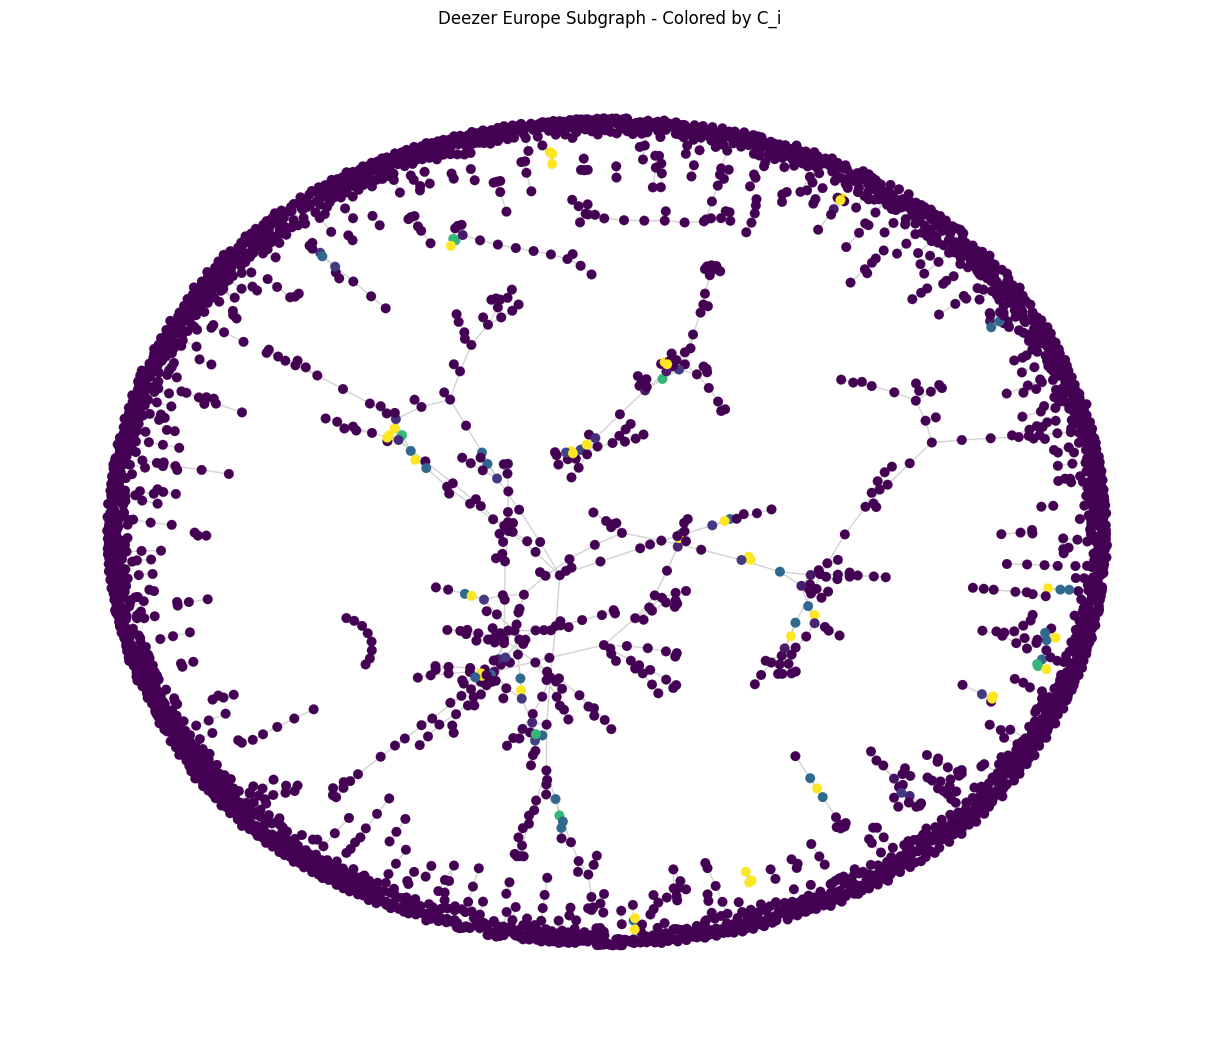

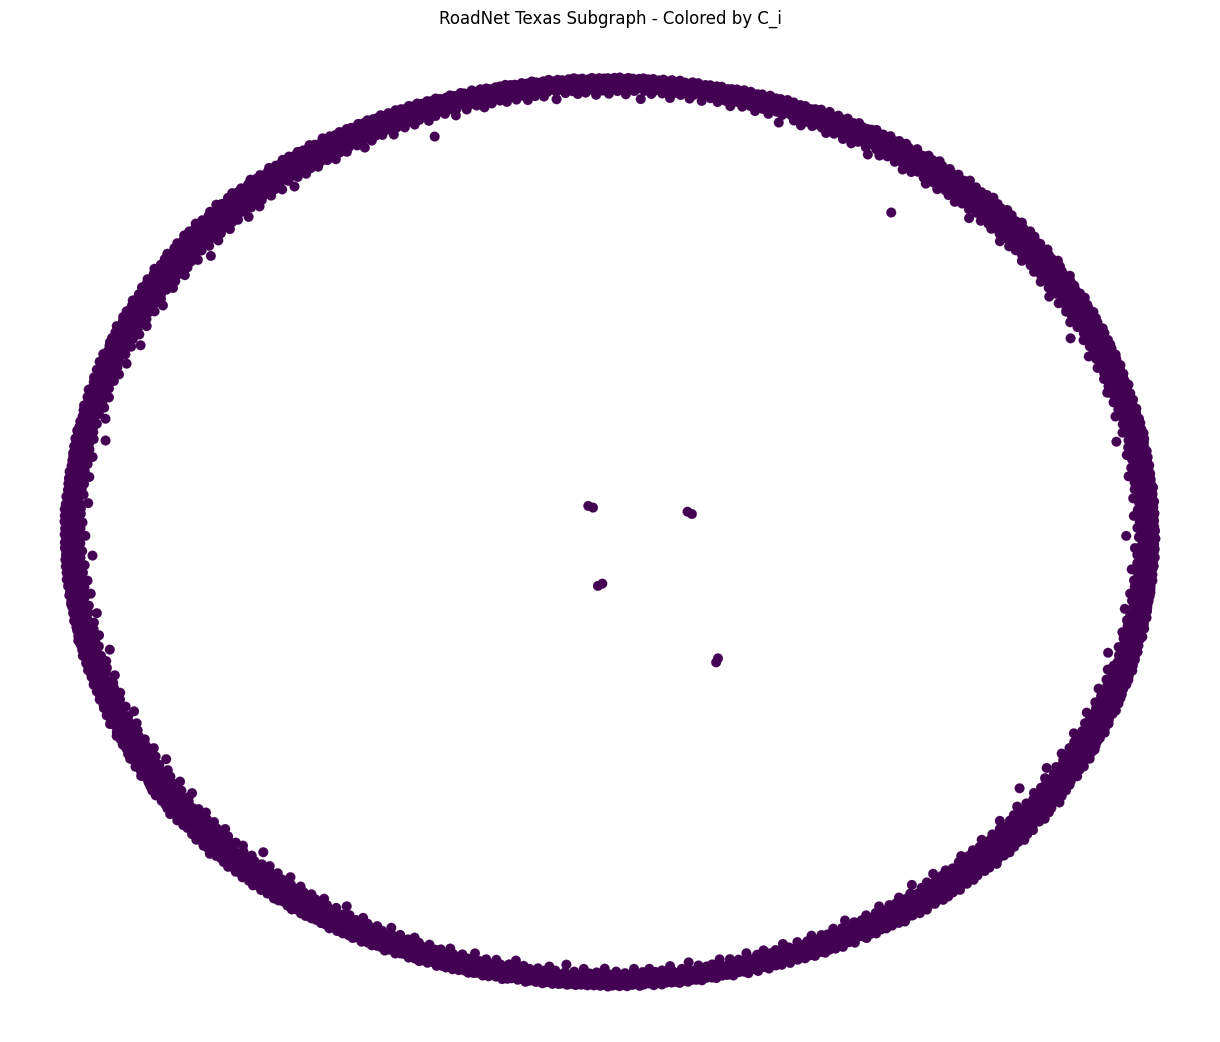

In [50]:
# --------------------------
# Plot Graph Colored by Local Clustering Coefficient
# --------------------------
def plot_by_clustering(G, title="Graph Colored by C_i"):
    # Compute local clustering coefficient
    clustering = nx.clustering(G)
    
    # Normalize to 0–1 for colormap
    ci_values = list(clustering.values())
    min_ci, max_ci = min(ci_values), max(ci_values)
    node_colors = [(clustering[n]-min_ci)/(max_ci-min_ci+1e-8) for n in G.nodes()]

    # Layout
    pos = nx.spring_layout(G, k=0.1, iterations=200, seed=42)

    # Draw
    plt.figure(figsize=(12,10))
    nx.draw(
        G,
        pos,
        node_color=node_colors,
        cmap=plt.cm.viridis,
        node_size=50,
        edge_color="lightgray",
        linewidths=0.1
    )
    plt.title(title)
    plt.axis("off")
    plt.show()

# --------------------------
# Example Usage
# --------------------------
G1_sample = sample_subgraph(G1, max_nodes=3000)
plot_by_clustering(G1_sample, "Deezer Europe Subgraph - Colored by C_i")

G2_sample = sample_subgraph(G2, max_nodes=3000)
plot_by_clustering(G2_sample, "RoadNet Texas Subgraph - Colored by C_i")


# Task 8.3

Nodes: 2000 Edges: 45753


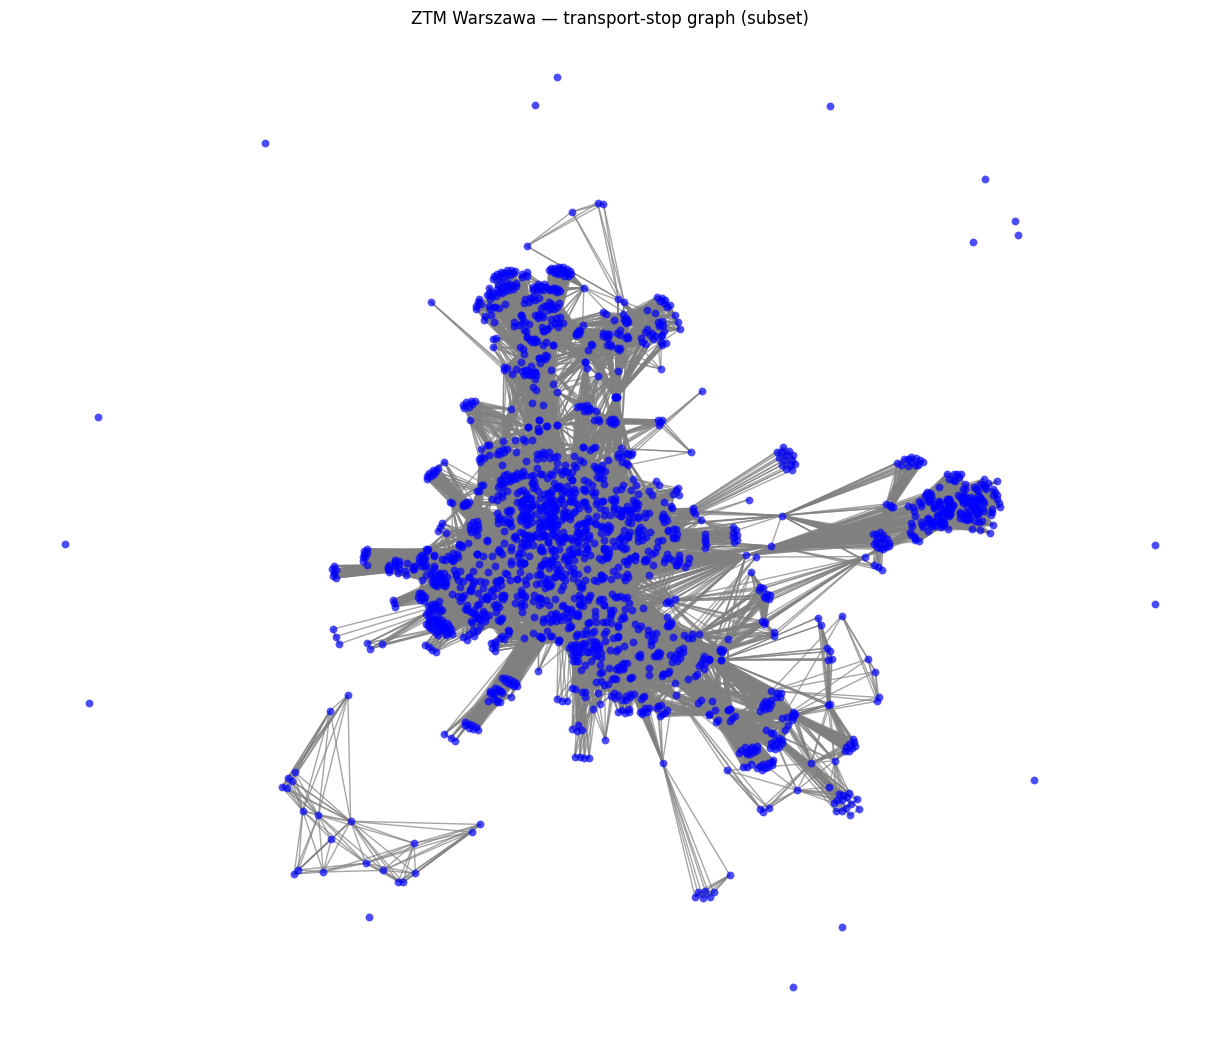

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# ---- Load GTFS stops + stop-times/trips data ----
stops = pd.read_csv("gtfs/stops.txt")          # all stops
stop_times = pd.read_csv("gtfs/stop_times.txt")  # which stops are on which trips
trips = pd.read_csv("gtfs/trips.txt")          # trip → route / transport line

# For simplicity: identify sets of stops served by same route (could also do trip-level)
# First join stop_times with trips to know route_id for each stop on each trip:
st = stop_times.merge(trips[['trip_id','route_id']], on='trip_id', how='left')

# Build map: route_id → list of stops
route_to_stops = st.groupby('route_id')['stop_id'].apply(set).to_dict()

# ---- Build graph: nodes = stops, edges if they share a route ----
G = nx.Graph()

# Optionally: sample a subset of stops to limit size:
MAX_STOPS = 2000
sampled = stops['stop_id'].sample(n=min(MAX_STOPS, len(stops)), random_state=42).tolist()

G.add_nodes_from(sampled)

for route, sset in route_to_stops.items():
    # consider only stops in our sampled set
    s = list(sset.intersection(sampled))
    # connect all pairs on this route (clique) — or optionally only consecutive stops
    for i in range(len(s)):
        for j in range(i+1, len(s)):
            G.add_edge(s[i], s[j])

print("Nodes:", G.number_of_nodes(), "Edges:", G.number_of_edges())

# ---- Draw the graph (simple spring layout) ----
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G, seed=42, k=0.1, iterations=50)
nx.draw(
    G,
    pos,
    node_size=30,
    node_color='blue',
    edge_color='gray',
    linewidths=0.1,
    alpha=0.7
)
plt.title("ZTM Warszawa — transport-stop graph (subset)")
plt.axis("off")
plt.show()


Ładowanie danych...
Przetwarzanie danych i tras...
Budowanie struktury grafu...
Pobieranie współrzędnych GPS...

--- Analiza Całej Sieci ---
--> Obliczono metryki dla: CAŁA SIEĆ


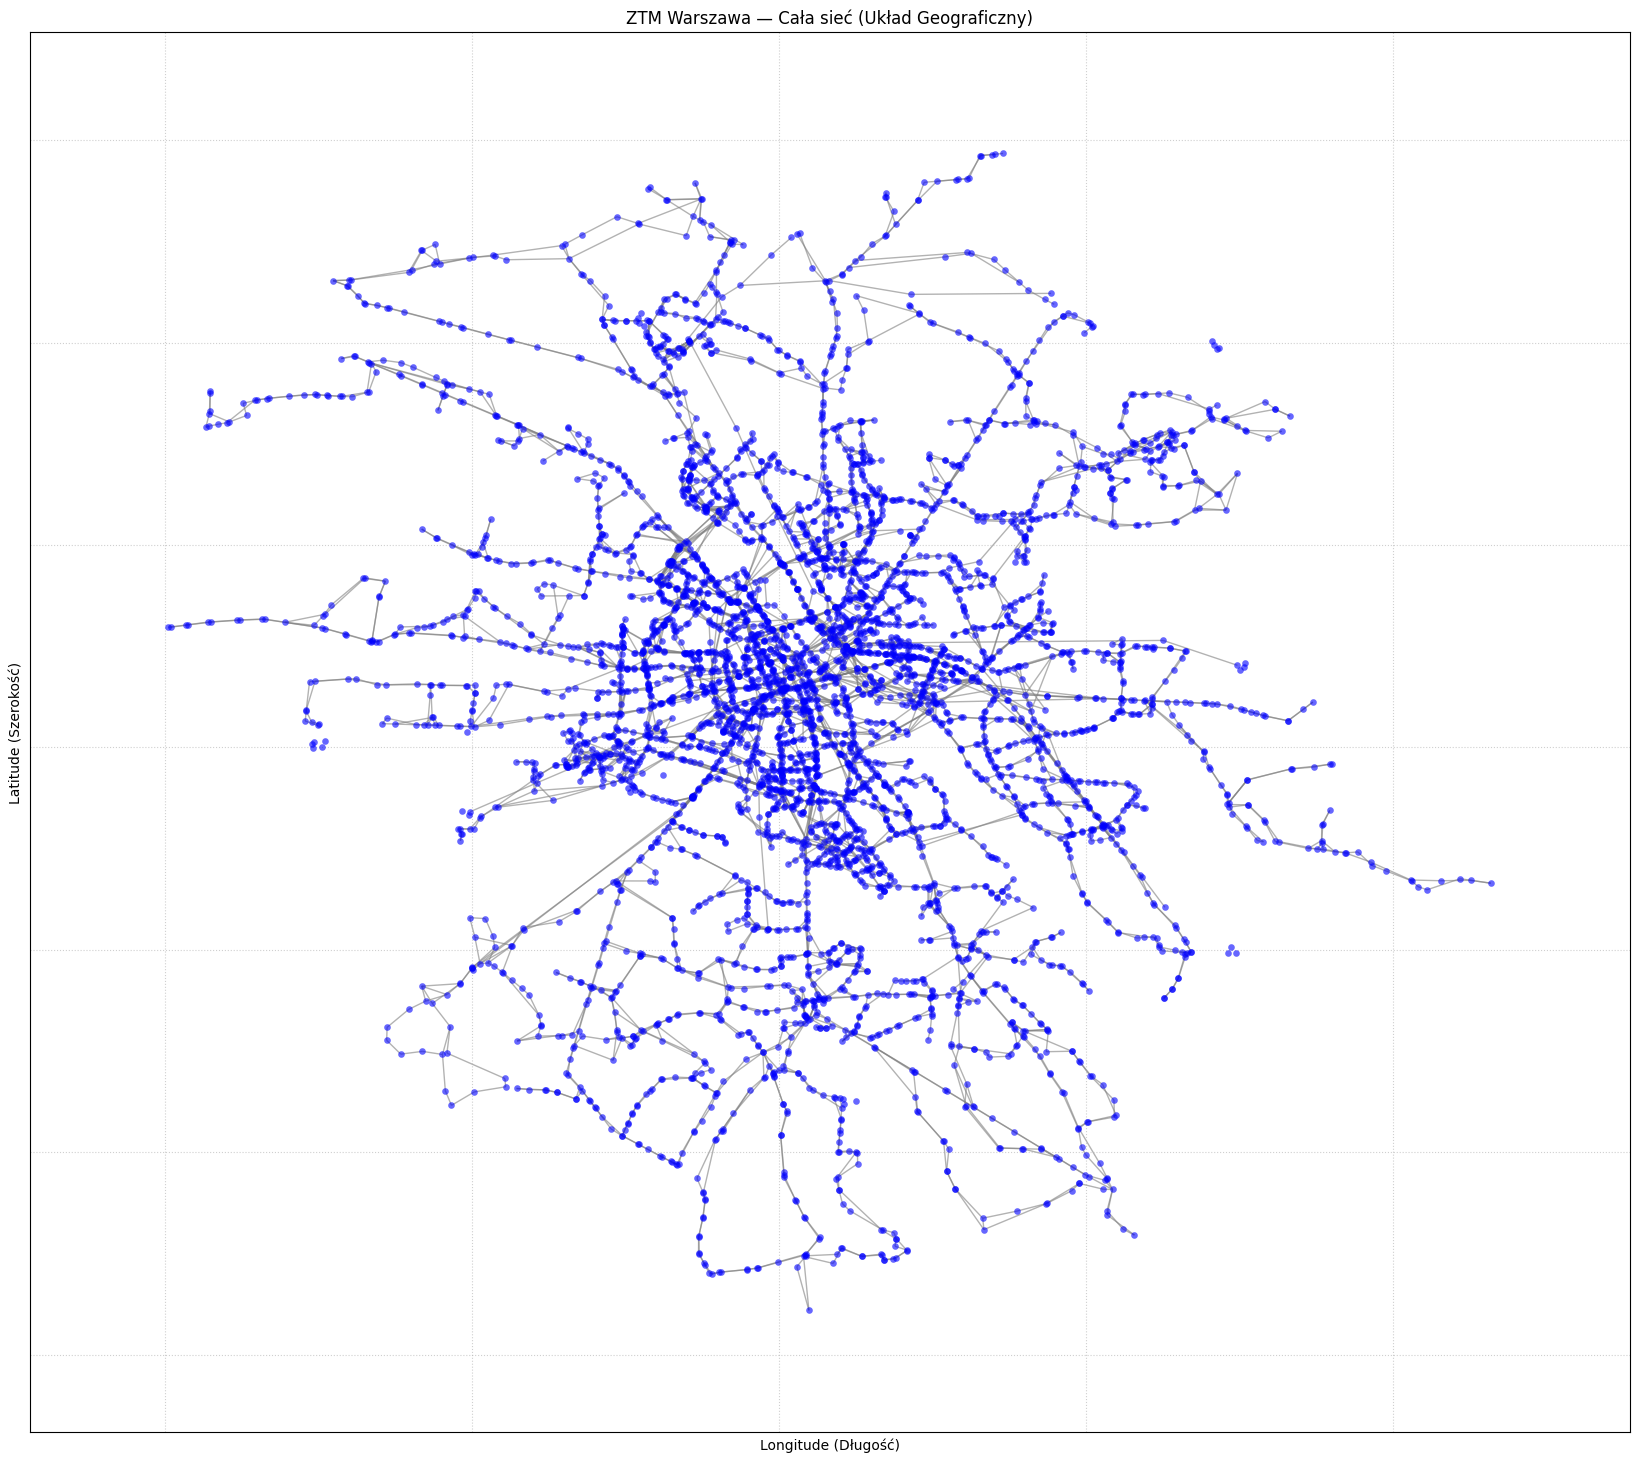

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# --- 1. Załadowanie Danych ---
print("Ładowanie danych...")
stops = pd.read_csv("gtfs/stops.txt")
stop_times = pd.read_csv("gtfs/stop_times.txt")
trips = pd.read_csv("gtfs/trips.txt")
routes = pd.read_csv("gtfs/routes.txt") 

# Ograniczenie liczby przystanków
MAX_STOPS = 5000
sampled_stops = stops['stop_id'].sample(n=min(MAX_STOPS, len(stops)), random_state=42).tolist()

# --- 2. Łączenie i Czyszczenie Danych ---
print("Przetwarzanie danych i tras...")
# Dołącz route_id i route_type
trips_routes = trips[['trip_id', 'route_id']].merge(
    routes[['route_id', 'route_type']], on='route_id', how='left'
)

# Połącz stop_times z informacjami o typie trasy
st_full = stop_times.merge(trips_routes, on='trip_id', how='left')

# Ogranicz do próbkowanych przystanków i posortuj, aby znaleźć połączenia konsekutywne
st_sampled = st_full[st_full['stop_id'].isin(sampled_stops)].sort_values(['trip_id', 'stop_sequence'])

# --- 3. Funkcja do Obliczenia Charakterystyk ---
def calculate_metrics(G_sub, name):
    N = G_sub.number_of_nodes()
    E = G_sub.number_of_edges()
    
    # Znajdowanie największej składowej spójnej (LCC)
    if N > 0:
        largest_cc = max(nx.connected_components(G_sub), key=len, default=set())
        G_lcc = G_sub.subgraph(largest_cc)
        N_lcc = G_lcc.number_of_nodes()
    else:
        N_lcc = 0

    if N_lcc > 1:
        avg_degree = (2 * E) / N
        avg_clustering = nx.average_clustering(G_lcc)
        # Uwaga: to może chwilę potrwać dla dużych grafów
        avg_path_length = nx.average_shortest_path_length(G_lcc)
        density = (2 * E) / (N * (N - 1))
    else:
        avg_degree, avg_clustering, avg_path_length, density = 0, 0, 0, 0

    print(f"--> Obliczono metryki dla: {name}")
    
    return {
        'Warstwa': name,
        'N': N,
        'E': E,
        'avg_k': f"{avg_degree:.4f}",
        'avg_C': f"{avg_clustering:.4f}",
        'avg_L_LCC': f"{avg_path_length:.4f}",
        'Density': f"{density:.6f}"
    }

# --- 4. Budowanie Grafów (Cała Sieć + Warstwy) ---
print("Budowanie struktury grafu...")
full_graph = nx.Graph()
edges_by_type = {}
all_edges = set()

# Mapowanie typów transportu (GTFS route_type)
type_map = {0: 'Tramwaj', 1: 'Metro', 2: 'Kolej', 3: 'Autobus'}

for trip_id, sequence_data in st_sampled.groupby('trip_id'):
    sequence = sequence_data['stop_id'].tolist()
    if not sequence: 
        continue
    
    # Zakładamy, że typ trasy jest stały dla trip_id
    route_type = sequence_data['route_type'].iloc[0] 
    
    if route_type not in edges_by_type:
        edges_by_type[route_type] = []
        
    for i in range(len(sequence) - 1):
        stop_a = sequence[i]
        stop_b = sequence[i+1]
        
        # Sortujemy tuple, aby krawędź A-B była tym samym co B-A (graf nieskierowany)
        edge = tuple(sorted((stop_a, stop_b))) 

        if edge not in all_edges:
            full_graph.add_edge(stop_a, stop_b)
            all_edges.add(edge)
            
        edges_by_type[route_type].append((stop_a, stop_b)) 

# Dodajemy wszystkie wylosowane węzły (nawet izolowane)
full_graph.add_nodes_from(sampled_stops)


# --- 5. Przygotowanie współrzędnych GPS (NOWOŚĆ) ---
print("Pobieranie współrzędnych GPS...")

# Wyciągamy dane tylko dla przystanków, które są w naszym podzbiorze
relevant_stops = stops[stops['stop_id'].isin(sampled_stops)]

# Tworzymy słownik: id_przystanku -> (lon, lat)
# X = stop_lon, Y = stop_lat
pos_gps = dict(zip(relevant_stops.stop_id, zip(relevant_stops.stop_lon, relevant_stops.stop_lat)))

# --- 6. Obliczenia i Wizualizacja ---

results = []

# A. CAŁA SIEĆ
print("\n--- Analiza Całej Sieci ---")
results.append(calculate_metrics(full_graph, "CAŁA SIEĆ"))

plt.figure(figsize=(16,14))
# Rysowanie z użyciem pos_gps zamiast spring_layout
nx.draw(
    full_graph,
    pos=pos_gps,  # KLUCZOWA ZMIANA: użycie GPS
    node_size=20,
    node_color='blue',
    edge_color='gray',
    linewidths=0.2,
    alpha=0.6,
    with_labels=False
)
plt.title("ZTM Warszawa — Cała sieć (Układ Geograficzny)")
plt.xlabel("Longitude (Długość)")
plt.ylabel("Latitude (Szerokość)")
plt.axis('on') # Włączamy osie, aby widzieć współrzędne
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# 8.4

Number of Nodes (N) - The number of stops in the given layer/network.

Number of Edges (E) - The number of direct connections between stops.

Average Degree (⟨k⟩) - The average number of direct connections/edges per stop. ⟨k⟩=N2E​.

Average Path Length (⟨L⟩) - The average shortest distance (number of transfers) between any two nodes in the largest connected component.

Clustering Coefficient (⟨C⟩) - A measure of the tendency for nodes to form groups (clusters). A value close to 1 indicates high clustering.

Density (ρ) - The ratio of existing edges to the maximum possible number of edges in an undirected graph: ρ=N(N−1)2E​.

Ładowanie danych GTFS...
Łączenie tabel i wyodrębnianie tras...


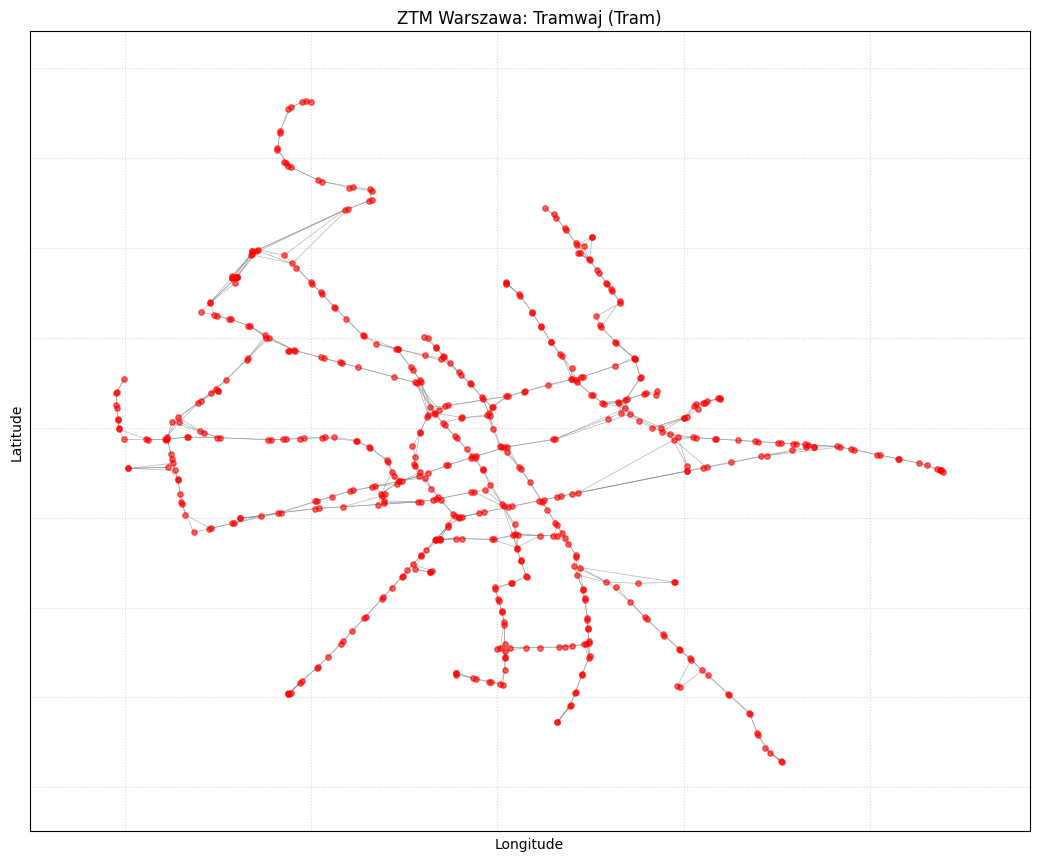

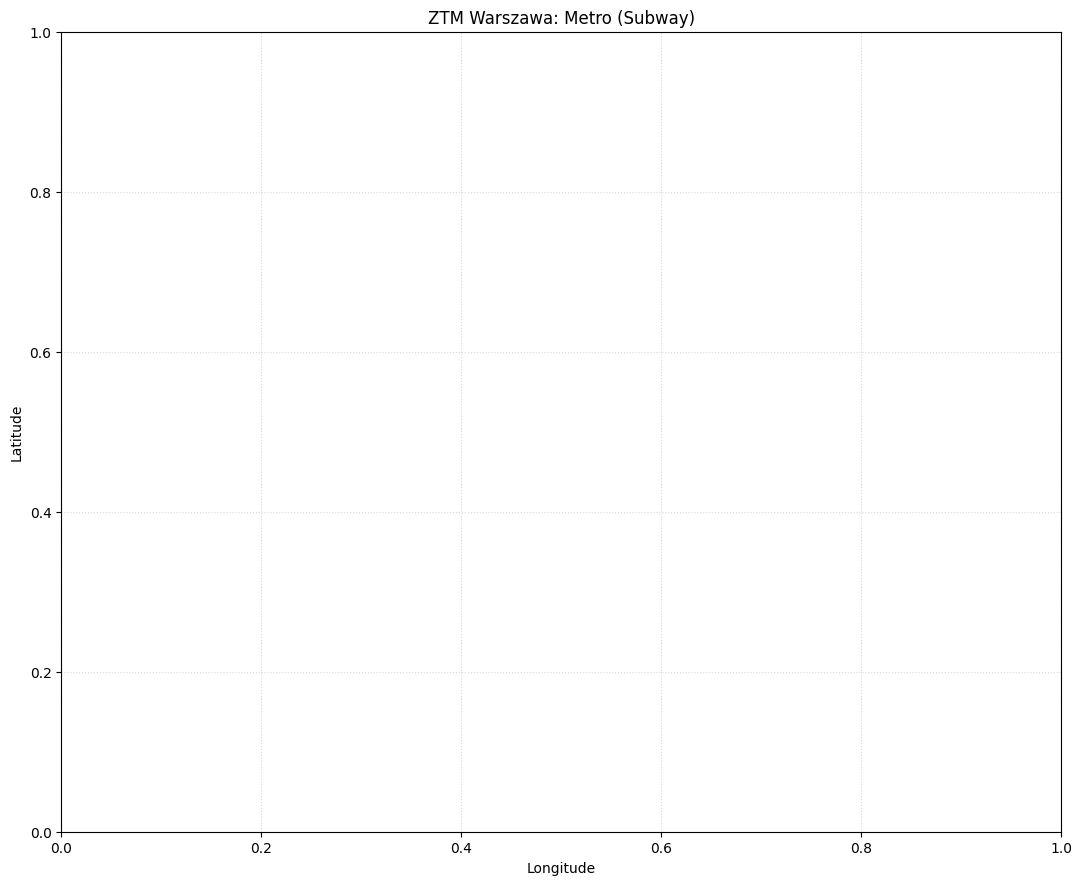

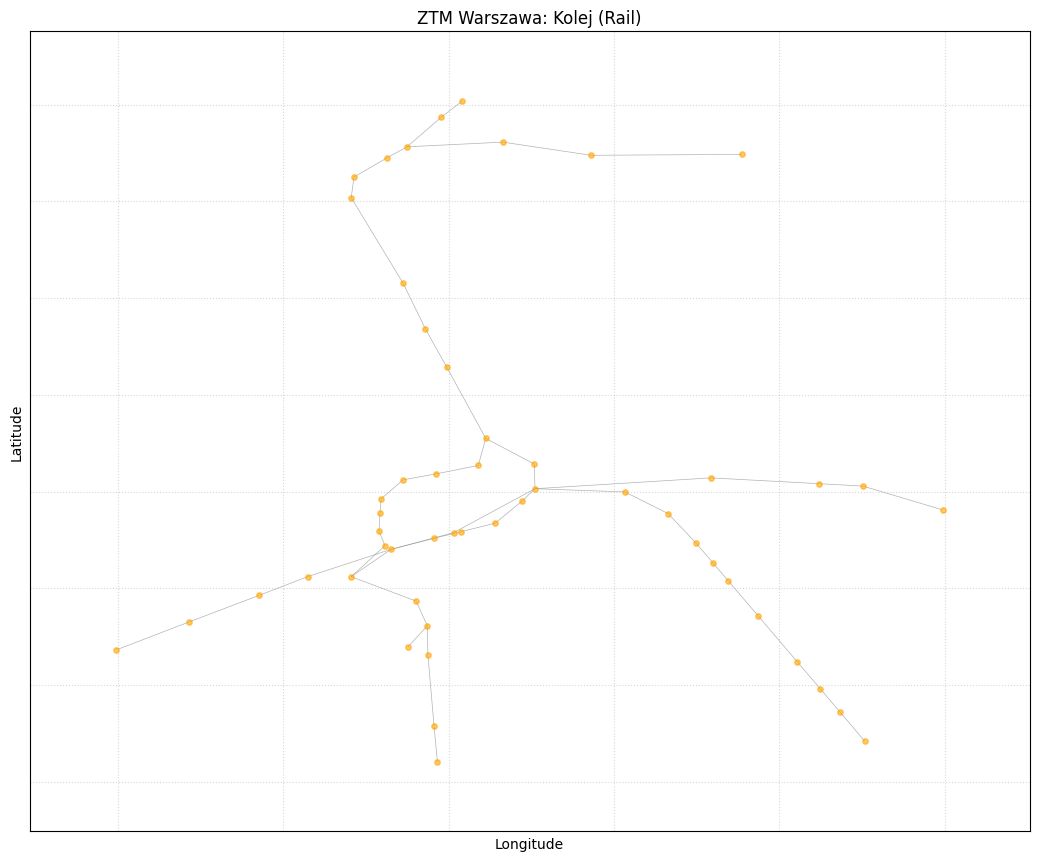

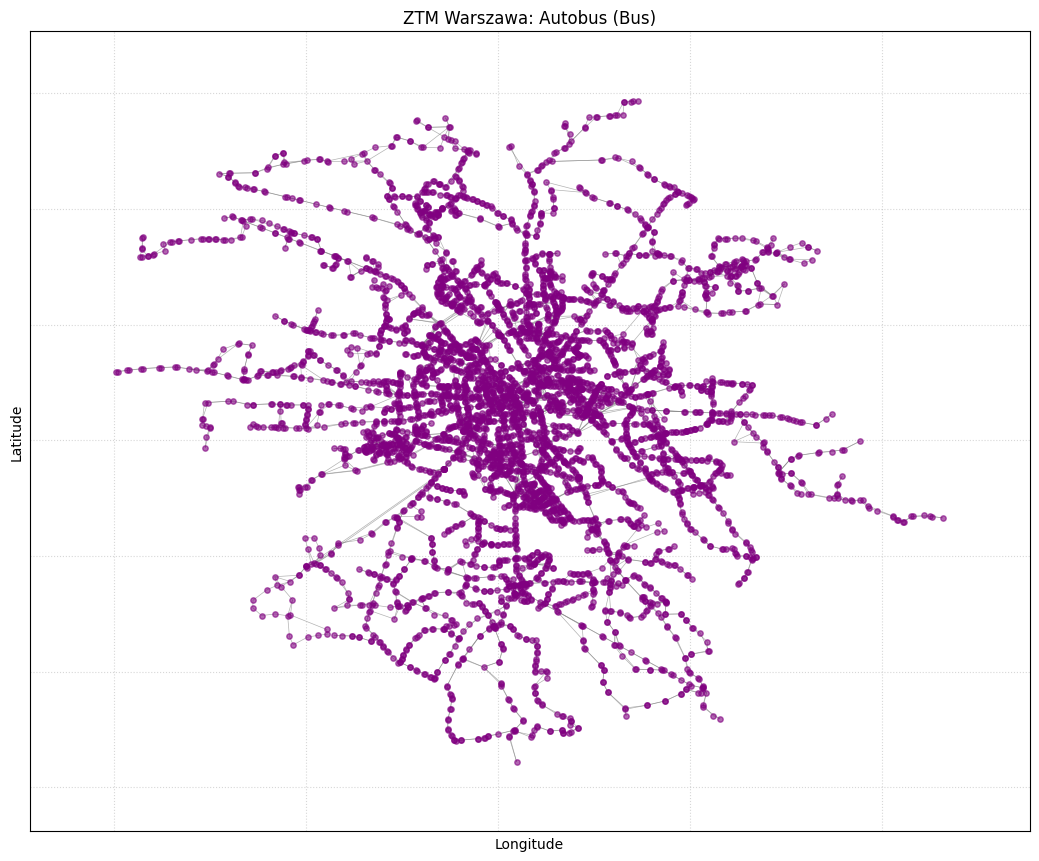

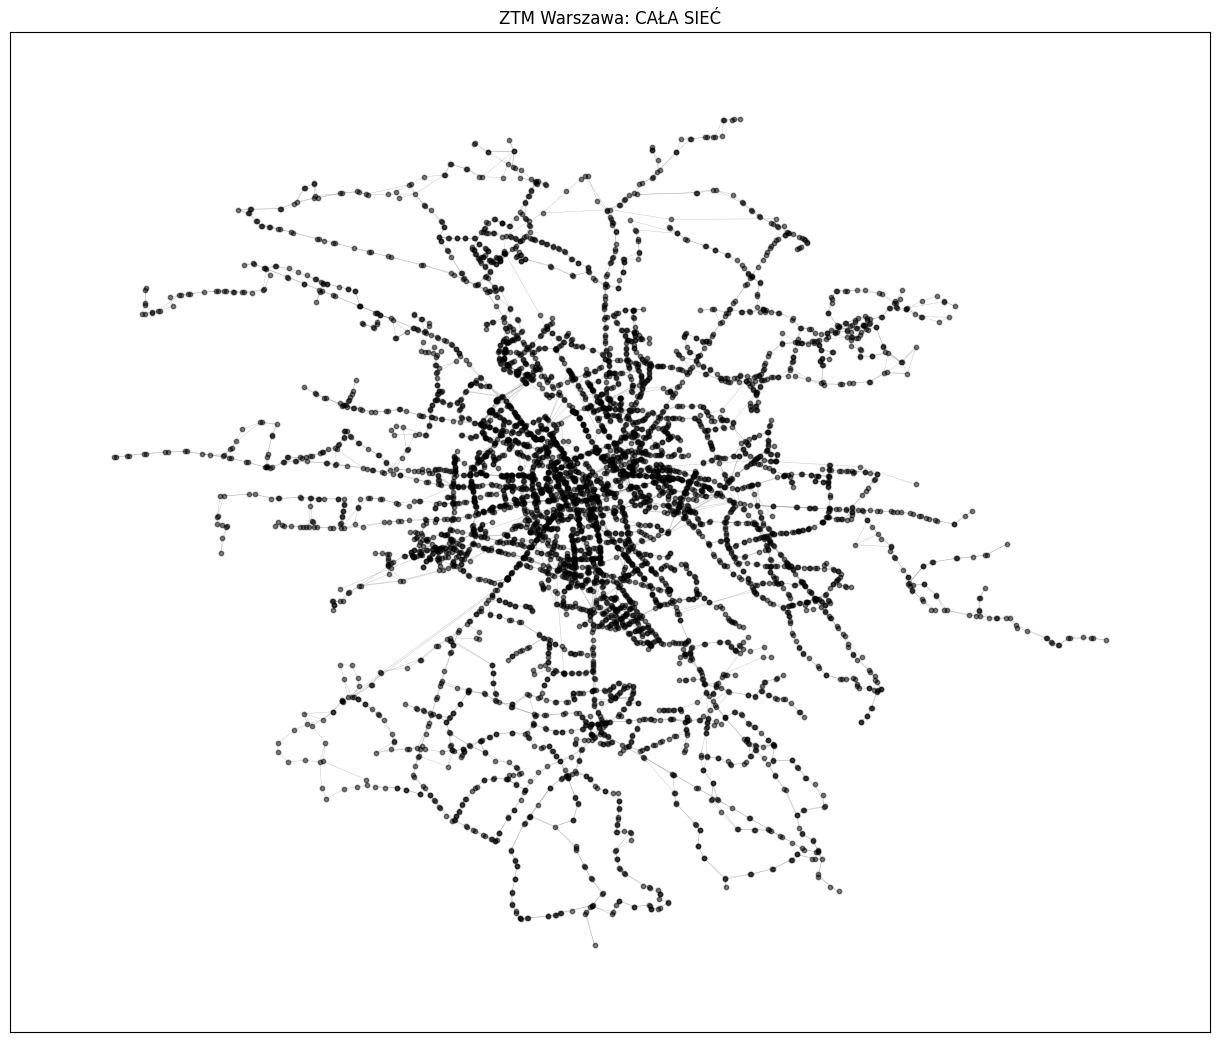


--- Network Characteristics (8.4) ---
| Layer           |    N |    E |    <k> |     <L> |    <C> |   Density |
|:----------------|-----:|-----:|-------:|--------:|-------:|----------:|
| Tramwaj (Tram)  |  547 |  677 | 2.4753 | 16.1042 | 0.0023 |  0.004534 |
| Metro (Subway)  |    0 |    0 | 0      |  0      | 0      |  0        |
| Kolej (Rail)    |   53 |   54 | 2.0377 |  8.2446 | 0      |  0.039187 |
| Autobus (Bus)   | 5358 | 7209 | 2.6909 | 28.8323 | 0.0246 |  0.000502 |
| CAŁA SIEĆ (ALL) | 5943 | 7935 | 2.6704 | 28.5116 | 0.0223 |  0.000449 |

results_df content:
             Layer     N     E     <k>      <L>     <C>   Density
0   Tramwaj (Tram)   547   677  2.4753  16.1042  0.0023  0.004534
1   Metro (Subway)     0     0  0.0000   0.0000  0.0000  0.000000
2     Kolej (Rail)    53    54  2.0377   8.2446  0.0000  0.039187
3    Autobus (Bus)  5358  7209  2.6909  28.8323  0.0246  0.000502
4  CAŁA SIEĆ (ALL)  5943  7935  2.6704  28.5116  0.0223  0.000449


In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- 1. Konfiguracja i Ładowanie Danych ---
# Wczytujemy wszystkie dane (zakładamy, że pliki są w folderze gtfs/)
print("Ładowanie danych GTFS...")
stops = pd.read_csv("gtfs/stops.txt")
stop_times = pd.read_csv("gtfs/stop_times.txt")
trips = pd.read_csv("gtfs/trips.txt")
routes = pd.read_csv("gtfs/routes.txt")

# Aby wyniki były ciekawe, zwiększamy próbkę lub bierzemy całość.
# Przy zbyt małej próbce Metro może nie mieć połączeń.
MAX_STOPS = 6000 
sampled_ids = stops['stop_id'].sample(n=min(MAX_STOPS, len(stops)), random_state=42).tolist()

# Filtrujemy stops do wybranego podzbioru
stops_sampled = stops[stops['stop_id'].isin(sampled_ids)]

# --- 2. Przygotowanie Współrzędnych (GPS) ---
# Słownik: id -> (lon, lat)
pos_gps = dict(zip(stops_sampled.stop_id, zip(stops_sampled.stop_lon, stops_sampled.stop_lat)))

# --- 3. Przetwarzanie Krawędzi dla Każdego Typu Transportu ---
print("Łączenie tabel i wyodrębnianie tras...")

# Dołączamy route_type do trips
trips_routes = trips[['trip_id', 'route_id']].merge(
    routes[['route_id', 'route_type']], on='route_id', how='left'
)

# Łączymy stop_times z informacją o trasie
merged = stop_times.merge(trips_routes, on='trip_id', how='left')

# Filtrujemy tylko te rekordy, które dotyczą naszych wylosowanych przystanków
merged = merged[merged['stop_id'].isin(sampled_ids)]

# Sortujemy, aby mieć właściwą kolejność przystanków
merged = merged.sort_values(['trip_id', 'stop_sequence'])

# Słownik do przechowywania krawędzi dla każdego typu: {route_type: set(edges)}
edges_by_type = {
    0: set(), # Tramwaj
    1: set(), # Metro
    2: set(), # Kolej
    3: set()  # Autobus
}
all_network_edges = set()

# Grupujemy po trip_id, aby odtworzyć przebiegi tras
for trip_id, group in merged.groupby('trip_id'):
    # Pobieramy listę przystanków w kolejności oraz typ trasy
    # (zakładamy, że typ trasy jest stały dla całej podróży)
    stops_seq = group['stop_id'].tolist()
    if not stops_seq: continue
    
    r_type = group['route_type'].iloc[0]
    
    # Pomijamy typy spoza standardu (np. trolejbusy jeśli są), skupiamy się na głównych
    if r_type not in edges_by_type:
        continue

    # Tworzymy krawędzie między kolejnymi przystankami
    for i in range(len(stops_seq) - 1):
        u, v = stops_seq[i], stops_seq[i+1]
        
        # Sortujemy, aby (u,v) i (v,u) były traktowane jako ta sama krawędź nieskierowana
        edge = tuple(sorted((u, v)))
        
        edges_by_type[r_type].add(edge)
        all_network_edges.add(edge)

# --- 4. Funkcja Obliczająca Metryki ---
def get_graph_metrics(G, name):
    N = G.number_of_nodes()
    E = G.number_of_edges()
    
    # Jeśli graf jest pusty
    if N == 0:
        return {'Layer': name, 'N': 0, 'E': 0, '<k>': 0, '<L>': 0, '<C>': 0, 'Density': 0}

    # Średni stopień <k> = 2E / N
    avg_k = (2 * E) / N
    
    # Gęstość
    density = nx.density(G)
    
    # Largest Connected Component (LCC) dla średniej drogi
    if N > 0:
        largest_cc = max(nx.connected_components(G), key=len)
        G_lcc = G.subgraph(largest_cc)
        # Średnia droga liczona tylko na LCC (inaczej jest nieskończona w grafie niespójnym)
        # Uwaga: dla dużych grafów to kosztowne obliczeniowo
        if G_lcc.number_of_nodes() > 1:
            avg_L = nx.average_shortest_path_length(G_lcc)
        else:
            avg_L = 0
    else:
        avg_L = 0
        
    # Współczynnik klasteryzacji
    avg_C = nx.average_clustering(G)

    return {
        'Layer': name,
        'N': N,
        'E': E,
        '<k>': round(avg_k, 4),
        '<L>': round(avg_L, 4),
        '<C>': round(avg_C, 4),
        'Density': round(density, 6)
    }

# --- 5. Budowanie Grafów, Wizualizacja i Raport ---
results = []
type_names = {0: 'Tramwaj (Tram)', 1: 'Metro (Subway)', 2: 'Kolej (Rail)', 3: 'Autobus (Bus)'}
colors = {0: 'red', 1: 'blue', 2: 'orange', 3: 'purple'}

# A. Analiza poszczególnych warstw
for r_type in [0, 1, 2, 3]:
    edges = list(edges_by_type[r_type])
    name = type_names[r_type]
    
    # Budujemy graf tylko z krawędzi danej warstwy
    # nx.Graph(edges) automatycznie doda tylko węzły, które są w krawędziach!
    G_layer = nx.Graph()
    G_layer.add_edges_from(edges)
    
    # Dodatkowe filtrowanie pozycji GPS tylko dla węzłów w tej warstwie
    current_nodes = list(G_layer.nodes())
    pos_layer = {node: pos_gps[node] for node in current_nodes if node in pos_gps}
    
    # Oblicz metryki
    metrics = get_graph_metrics(G_layer, name)
    results.append(metrics)
    
    # Rysuj
    plt.figure(figsize=(10, 8))
    nx.draw(
        G_layer, 
        pos=pos_layer, 
        node_size=15, 
        node_color=colors[r_type], 
        edge_color='gray', 
        alpha=0.6,
        width=0.5,
        with_labels=False
    )
    plt.title(f"ZTM Warszawa: {name}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.axis('on')
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.show()

# B. Analiza całej sieci (Wszystkie warstwy razem)
G_full = nx.Graph()
G_full.add_edges_from(list(all_network_edges))
# Dodajemy ewentualne izolowane węzły z próbki, jeśli chcemy widzieć całą próbkę
# (opcjonalnie, zależy od definicji "Whole Network" w zadaniu. Tu dodaję tylko połączone)

metrics_full = get_graph_metrics(G_full, "CAŁA SIEĆ (ALL)")
results.append(metrics_full)

plt.figure(figsize=(12, 10))
nx.draw(
    G_full, 
    pos={n: pos_gps[n] for n in G_full.nodes() if n in pos_gps}, 
    node_size=10, 
    node_color='black', 
    edge_color='gray', 
    alpha=0.5,
    width=0.3,
    with_labels=False
)
plt.title("ZTM Warszawa: CAŁA SIEĆ")
plt.axis('on')
plt.show()

# --- 6. Wyświetlenie Wyników (DataFrame) ---
results_df = pd.DataFrame(results)
print("\n--- Network Characteristics (8.4) ---")
print(results_df.to_markdown(index=False))

# Wyprintowanie samego obiektu na koniec, jak prosiłeś
print("\nresults_df content:")
print(results_df)

# P8.5

Ładowanie danych...
Wybrano reprezentatywny service_id: 2_5 (najwięcej kursów)
Liczba zdarzeń do przetworzenia: 937486
Konwersja czasu na sekundy...
Wygenerowano sieć temporalną: 903938 połączeń.


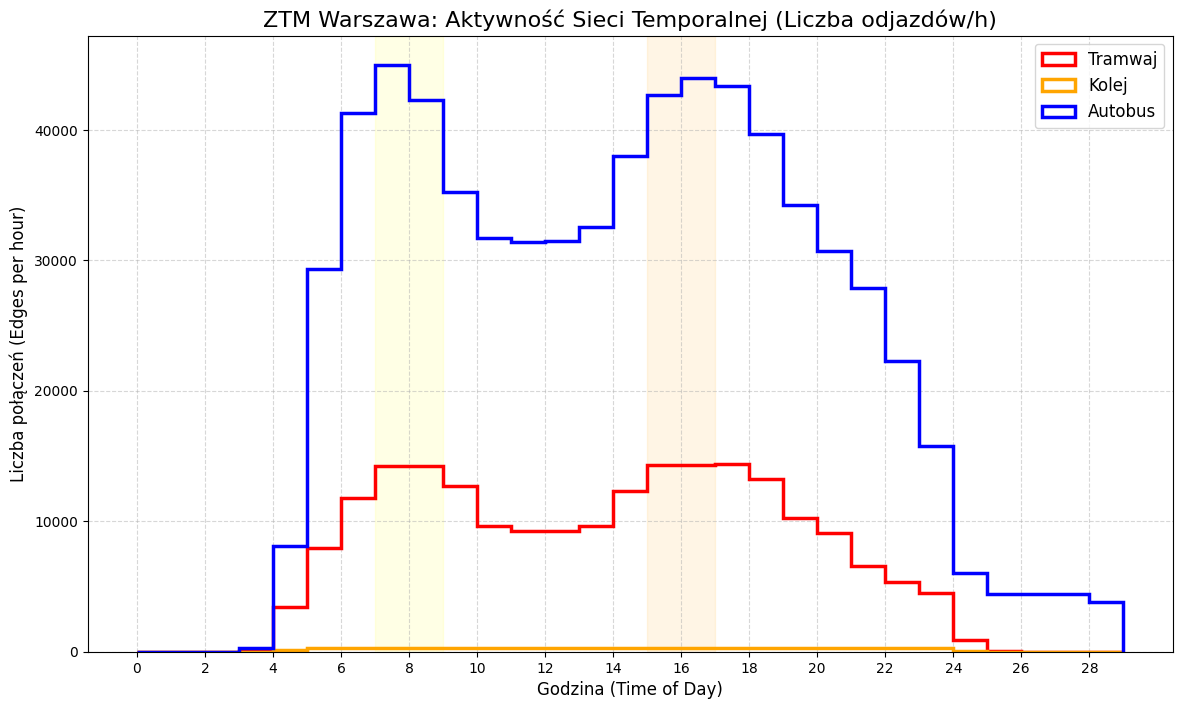


Przykładowe krawędzie temporalne (Format: Skąd, Dokąd, Czas Start, Czas Koniec, Typ):
 stop_id  next_stop_id  t_dep_sec  next_arr_time  route_type
    2878        2880.0      18720        18780.0           3
    2880         435.0      18780        18840.0           3
     435        6040.0      18840        18900.0           3
    6040        6039.0      18900        18960.0           3
    6039        5922.0      18960        19020.0           3
    5922        5920.0      19020        19020.0           3
    5920        5918.0      19020        19080.0           3
    5918        4050.0      19080        19140.0           3
    4050         258.0      19140        19200.0           3
     258         259.0      19200        19260.0           3


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Ładowanie Wybranych Plików ---
print("Ładowanie danych...")
# Wczytujemy tylko niezbędne kolumny, aby oszczędzać pamięć
trips = pd.read_csv("gtfs/trips.txt", usecols=['route_id', 'service_id', 'trip_id'])
stop_times = pd.read_csv("gtfs/stop_times.txt", usecols=['trip_id', 'arrival_time', 'departure_time', 'stop_id', 'stop_sequence'])
routes = pd.read_csv("gtfs/routes.txt", usecols=['route_id', 'route_type'])
# stops wczytujemy tylko po to, by filtrować do naszego podzbioru z poprzedniego zadania
stops = pd.read_csv("gtfs/stops.txt", usecols=['stop_id'])

# --- 2. Wybór Reprezentatywnego Dnia (Service ID) ---
# Zamiast mieszać soboty z wtorkami, wybieramy service_id, który ma najwięcej przejazdów.
# To da nam obraz "typowego dnia szczytowego".
top_service_id = trips['service_id'].value_counts().idxmax()
print(f"Wybrano reprezentatywny service_id: {top_service_id} (najwięcej kursów)")

# Filtrujemy trips tylko dla tego serwisu
active_trips = trips[trips['service_id'] == top_service_id]
active_trip_ids = active_trips['trip_id'].unique()

# Filtrujemy stop_times tylko dla aktywnych tripów
df = stop_times[stop_times['trip_id'].isin(active_trip_ids)].copy()

# (Opcjonalnie) Ograniczenie do próbki przystanków z poprzedniego zadania, 
# jeśli chcesz zachować spójność z małym grafem. Jeśli chcesz całą sieć, zakomentuj te 3 linie:
# MAX_STOPS = 5000
# sampled_ids = stops['stop_id'].sample(n=min(MAX_STOPS, len(stops)), random_state=42).tolist()
# df = df[df['stop_id'].isin(sampled_ids)]

print(f"Liczba zdarzeń do przetworzenia: {len(df)}")

# --- 3. Konwersja Czasu ---
def time_to_seconds(t_str):
    """Konwertuje HH:MM:SS na sekundy. Obsługuje godziny > 24 (specyfika GTFS)."""
    try:
        h, m, s = map(int, t_str.split(':'))
        return h * 3600 + m * 60 + s
    except:
        return np.nan

print("Konwersja czasu na sekundy...")
# Konwertujemy tylko departure (odjazd z A) i arrival (przyjazd do B)
df['t_dep_sec'] = df['departure_time'].apply(time_to_seconds)
df['t_arr_sec'] = df['arrival_time'].apply(time_to_seconds)

# --- 4. Budowa Krawędzi Temporalnych (Vectorized) ---
# Sortujemy: najpierw trip, potem kolejność przystanków
df = df.sort_values(['trip_id', 'stop_sequence'])

# Tworzymy kolumny "Next Stop" przesuwając dane o 1 wiersz w górę
df['next_stop_id'] = df.groupby('trip_id')['stop_id'].shift(-1)
df['next_arr_time'] = df.groupby('trip_id')['t_arr_sec'].shift(-1)

# Usuwamy wiersze, które nie mają następnika (ostatnie przystanki na trasie)
temporal_edges = df.dropna(subset=['next_stop_id', 'next_arr_time']).copy()

# Dołączamy informację o typie transportu (route_type)
# trip_id -> route_id -> route_type
trips_with_routes = active_trips.merge(routes, on='route_id', how='left')
temporal_edges = temporal_edges.merge(trips_with_routes[['trip_id', 'route_type']], on='trip_id', how='left')

# Selekcja finalnych kolumn: U, V, T_start, T_end, Type
temporal_net = temporal_edges[['stop_id', 'next_stop_id', 't_dep_sec', 'next_arr_time', 'route_type']]

print(f"Wygenerowano sieć temporalną: {len(temporal_net)} połączeń.")

# --- 5. Wizualizacja Aktywności (Histogram) ---
plt.figure(figsize=(14, 8))

# Konwersja na godziny dla czytelności
start_hours = temporal_net['t_dep_sec'] / 3600

# Mapa nazw i kolorów
type_map = {0: 'Tramwaj', 1: 'Metro', 2: 'Kolej', 3: 'Autobus'}
colors = {0: 'red', 1: 'green', 2: 'orange', 3: 'blue'}

# Rysujemy histogramy liniowe dla każdego typu
for r_type in sorted(temporal_net['route_type'].unique()):
    subset = start_hours[temporal_net['route_type'] == r_type]
    label = type_map.get(r_type, f"Typ {r_type}")
    
    # Histogram jako linia (step)
    plt.hist(subset, bins=range(0, 30), histtype='step', linewidth=2.5, 
             label=label, color=colors.get(r_type, 'gray'))

plt.title("ZTM Warszawa: Aktywność Sieci Temporalnej (Liczba odjazdów/h)", fontsize=16)
plt.xlabel("Godzina (Time of Day)", fontsize=12)
plt.ylabel("Liczba połączeń (Edges per hour)", fontsize=12)
plt.xticks(range(0, 29, 2)) # Podziałka co 2h
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)

# Dodanie adnotacji o szczytach (opcjonalnie)
plt.axvspan(7, 9, color='yellow', alpha=0.1, label='Szczyt Poranny')
plt.axvspan(15, 17, color='orange', alpha=0.1, label='Szczyt Popołudniowy')

plt.show()

# --- 6. Wyświetlenie Próbki Danych (Wynik zadania) ---
print("\nPrzykładowe krawędzie temporalne (Format: Skąd, Dokąd, Czas Start, Czas Koniec, Typ):")
print(temporal_net.head(10).to_string(index=False))

In [11]:
!ls gtfs

agency.txt         feed_info.txt      stop_times.txt
calendar.txt       routes.txt         stops.txt
calendar_dates.txt shapes.txt         trips.txt


# 8.7 animation

In [16]:
!pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=05324eae0ce59bdc791aa58aec10860ee17339838b12fffaf5029b5abf7aaa83
  Stored in directory: /Users/janpoglod/Library/Caches/pip/wheels/1d/57/24/4eff6a03a9ea0e647568e8a5a0546cdf957e3cf005372c0245
Successfully built ffmpeg


In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# --- (Assuming previous code ran and temporal_net exists) ---
# Make sure you have ran the previous code block to generate 'temporal_net'
# and 'active_trip_ids'.

# --- 1. Load Stops Data with GPS Coordinates ---
print("Ładowanie danych przystanków z GPS...")
# We need all stops that are part of our temporal network
needed_stop_ids = set(temporal_net['stop_id']).union(set(temporal_net['next_stop_id']))
stops_geo = pd.read_csv("gtfs/stops.txt", usecols=['stop_id', 'stop_lat', 'stop_lon'])
stops_geo = stops_geo[stops_geo['stop_id'].isin(needed_stop_ids)]

# Create a position dictionary: {stop_id: (lon, lat)}
pos_gps = {row['stop_id']: (row['stop_lon'], row['stop_lat']) for _, row in stops_geo.iterrows()}

# --- 2. Create the Static Base Graph ---
print("Tworzenie grafu bazowego...")
G_base = nx.Graph()
G_base.add_nodes_from(pos_gps.keys())

# Add all unique edges from the temporal network to the base graph
unique_edges = set()
for _, row in temporal_net.iterrows():
    u, v = row['stop_id'], row['next_stop_id']
    edge = tuple(sorted((u, v))) # Undirected edge
    unique_edges.add(edge)

G_base.add_edges_from(unique_edges)

# --- 3. Animation Setup ---
# Define time range for animation (e.g., from 4:00 to 26:00)
start_time_sec = 4 * 3600
end_time_sec = 26 * 3600
# How many real-world seconds each animation frame represents
time_step = 60  # 1 frame = 1 minute of traffic

frames = range(start_time_sec, end_time_sec, time_step)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))
fig.patch.set_facecolor('black') # Dark background for better contrast
ax.set_facecolor('black')
ax.set_title("ZTM Warszawa Traffic Flow (Time: 04:00)", color='white', fontsize=15)
ax.axis('off')

# Draw the static base graph (roads/tracks) once
nx.draw_networkx_edges(
    G_base,
    pos=pos_gps,
    ax=ax,
    edge_color='gray',
    width=0.5,
    alpha=0.3,
    arrows=False
)
# Draw nodes (stops)
nx.draw_networkx_nodes(
    G_base,
    pos=pos_gps,
    ax=ax,
    node_size=5,
    node_color='white',
    alpha=0.5
)

# Initialize the scatter plot for moving vehicles
# We'll update the positions and colors of these points in each frame
vehicles_scatter = ax.scatter([], [], s=15, zorder=5)

# Color mapping for vehicle types
type_colors = {0: 'red', 1: 'lime', 2: 'orange', 3: 'cyan'} # Tram, Metro, Rail, Bus

# --- 4. Animation Update Function ---
def update(current_time_sec):
    """Called for each frame to update vehicle positions."""
    # Update title with current time
    h = int(current_time_sec // 3600)
    m = int((current_time_sec % 3600) // 60)
    ax.set_title(f"ZTM Warszawa Traffic Flow (Time: {h:02}:{m:02})", color='white', fontsize=15)
    
    # Find active vehicles at this moment
    # A vehicle is active if current_time is between its departure and arrival at next stop
    active_mask = (temporal_net['t_dep_sec'] <= current_time_sec) & \
                  (temporal_net['next_arr_time'] > current_time_sec)
    active_edges = temporal_net[active_mask].copy()
    
    if active_edges.empty:
        vehicles_scatter.set_offsets(np.empty((0, 2)))
        return vehicles_scatter,

    vehicle_positions = []
    vehicle_colors = []

    # Calculate position for each active vehicle
    for _, row in active_edges.iterrows():
        u, v = row['stop_id'], row['next_stop_id']
        t_start, t_end = row['t_dep_sec'], row['next_arr_time']
        r_type = row['route_type']

        # Get coordinates of start and end stops
        pos_u = np.array(pos_gps[u])
        pos_v = np.array(pos_gps[v])
        
        # Calculate progress ratio (0.0 at start, 1.0 at end)
        # Avoid division by zero if t_start == t_end (should not happen in valid GTFS)
        duration = t_end - t_start
        progress = (current_time_sec - t_start) / duration if duration > 0 else 1.0
        
        # Linear interpolation of position
        current_pos = pos_u + progress * (pos_v - pos_u)
        
        vehicle_positions.append(current_pos)
        vehicle_colors.append(type_colors.get(r_type, 'white'))
    
    # Update the scatter plot with new positions and colors
    vehicles_scatter.set_offsets(vehicle_positions)
    vehicles_scatter.set_color(vehicle_colors)
    
    return vehicles_scatter,

# --- 5. Generate and Save Animation ---
# --- 5. Generate and Save Animation (Jako GIF) ---
print("Generowanie animacji (to może potrwać kilka minut)...")

ani = animation.FuncAnimation(
    fig,
    update,
    frames=frames,
    interval=50,
    blit=True
)

# Zmieniamy rozszerzenie na .gif i writer na 'pillow'
output_file = "ztm_warszawa_traffic.gif"

# Używamy writera 'pillow', który jest standardowo w Pythonie
ani.save(output_file, writer='pillow', fps=20)

print(f"Animacja zapisana do pliku: {output_file}")
plt.close(fig)

Ładowanie danych przystanków z GPS...
Tworzenie grafu bazowego...
Generowanie animacji (to może potrwać kilka minut)...
Animacja zapisana do pliku: ztm_warszawa_traffic.gif


# 8.8

Analyzing network evolution from 4:00 to 24:00...
Window: 30 min, Step: 15 min


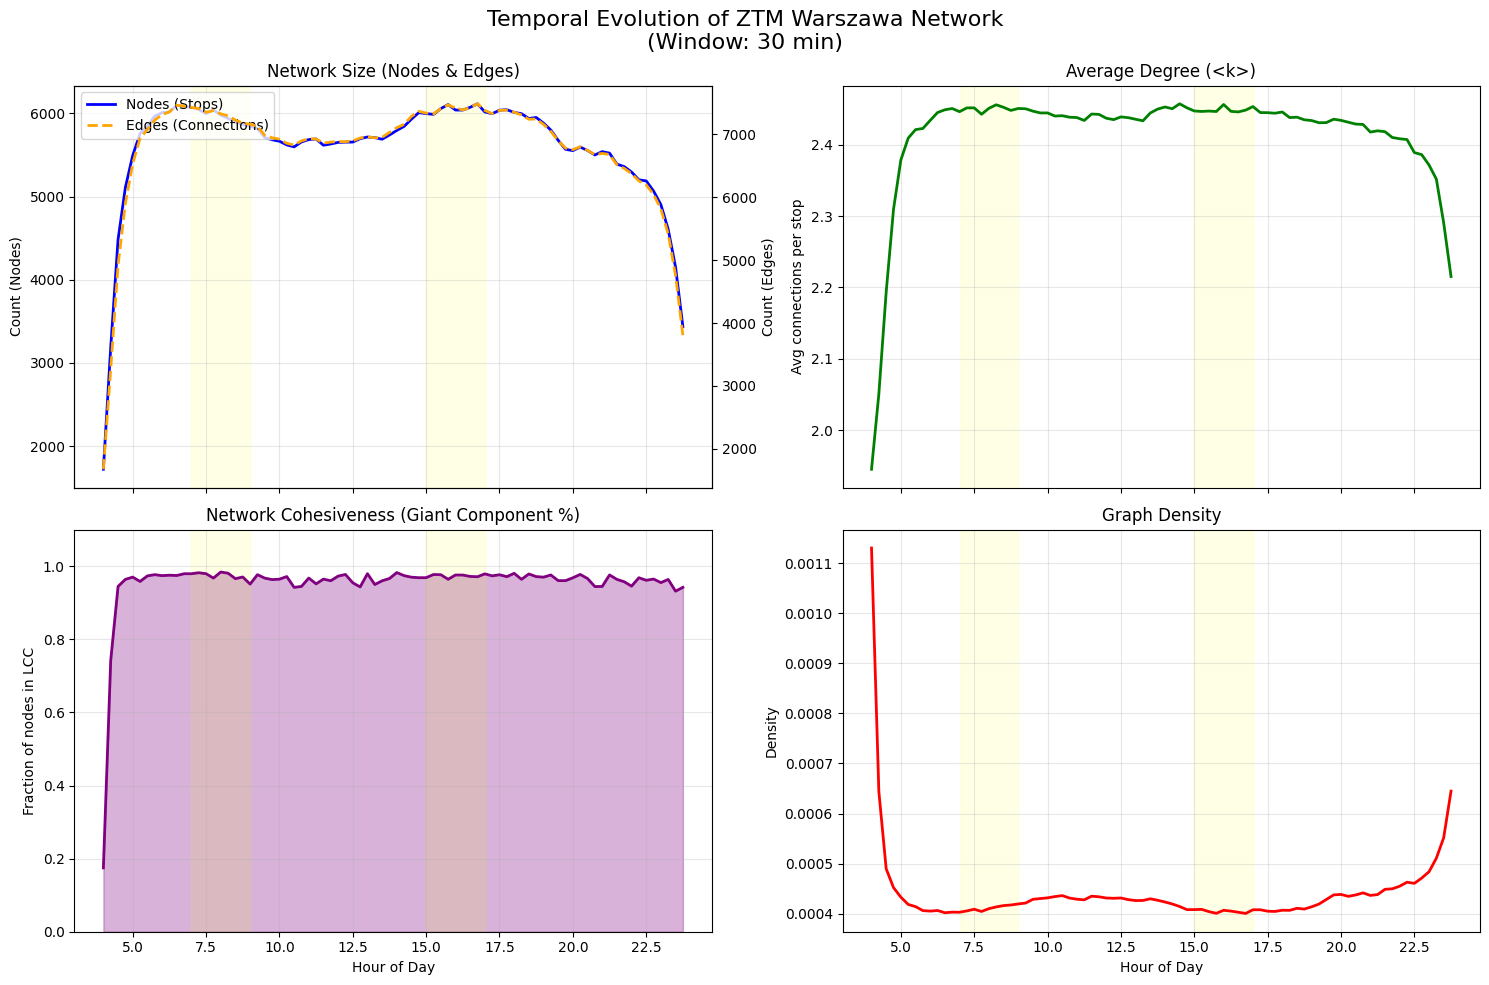

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Configuration ---
START_HOUR = 4
END_HOUR = 24 
WINDOW_SIZE_MIN = 30  # We aggregate data in 30-minute windows
STEP_SIZE_MIN = 15    # We move the window every 15 minutes (Sliding Window)

# Convert to seconds
window_sec = WINDOW_SIZE_MIN * 60
step_sec = STEP_SIZE_MIN * 60

# Time points to analyze
time_points = range(START_HOUR * 3600, END_HOUR * 3600, step_sec)

# Storage for results
results = {
    'time_sec': [],
    'N': [],          # Number of nodes
    'E': [],          # Number of edges
    'avg_k': [],      # Average Degree
    'LCC_rel': [],    # Relative size of Largest Connected Component (0.0 - 1.0)
    'Density': []     # Graph density
}

print(f"Analyzing network evolution from {START_HOUR}:00 to {END_HOUR}:00...")
print(f"Window: {WINDOW_SIZE_MIN} min, Step: {STEP_SIZE_MIN} min")

for t in time_points:
    # 1. Filter edges active in the window [t, t + window]
    # We look for trips STARTING in this window (representing available service)
    mask = (temporal_net['t_dep_sec'] >= t) & (temporal_net['t_dep_sec'] < t + window_sec)
    subset = temporal_net[mask]
    
    # 2. Build the snapshot graph
    if subset.empty:
        # If night time/no traffic
        results['time_sec'].append(t)
        results['N'].append(0)
        results['E'].append(0)
        results['avg_k'].append(0)
        results['LCC_rel'].append(0)
        results['Density'].append(0)
        continue
        
    G_t = nx.from_pandas_edgelist(subset, 'stop_id', 'next_stop_id')
    
    # 3. Calculate Metrics
    N = G_t.number_of_nodes()
    E = G_t.number_of_edges()
    
    # Average Degree
    avg_k = (2 * E) / N if N > 0 else 0
    
    # Density
    dens = (2 * E) / (N * (N - 1)) if N > 1 else 0
    
    # LCC (Giant Component)
    if N > 0:
        largest_cc = max(nx.connected_components(G_t), key=len)
        lcc_size = len(largest_cc)
        lcc_rel = lcc_size / N  # How much of the current network is connected?
    else:
        lcc_rel = 0
        
    # Store
    results['time_sec'].append(t)
    results['N'].append(N)
    results['E'].append(E)
    results['avg_k'].append(avg_k)
    results['LCC_rel'].append(lcc_rel)
    results['Density'].append(dens)

# Convert to DataFrame
res_df = pd.DataFrame(results)
res_df['hour'] = res_df['time_sec'] / 3600

# --- Visualization ---
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
fig.suptitle(f"Temporal Evolution of ZTM Warszawa Network\n(Window: {WINDOW_SIZE_MIN} min)", fontsize=16)

# Plot 1: Active Nodes & Edges
ax1 = axes[0, 0]
ax1.plot(res_df['hour'], res_df['N'], label='Nodes (Stops)', color='blue', lw=2)
ax1_twin = ax1.twinx()
ax1_twin.plot(res_df['hour'], res_df['E'], label='Edges (Connections)', color='orange', lw=2, linestyle='--')
ax1.set_title("Network Size (Nodes & Edges)")
ax1.set_ylabel("Count (Nodes)")
ax1_twin.set_ylabel("Count (Edges)")
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Average Degree
ax2 = axes[0, 1]
ax2.plot(res_df['hour'], res_df['avg_k'], color='green', lw=2)
ax2.set_title("Average Degree (<k>)")
ax2.set_ylabel("Avg connections per stop")
ax2.grid(True, alpha=0.3)

# Plot 3: Network Connectivity (LCC)
ax3 = axes[1, 0]
ax3.fill_between(res_df['hour'], res_df['LCC_rel'], color='purple', alpha=0.3)
ax3.plot(res_df['hour'], res_df['LCC_rel'], color='purple', lw=2)
ax3.set_title("Network Cohesiveness (Giant Component %)")
ax3.set_ylabel("Fraction of nodes in LCC")
ax3.set_ylim(0, 1.1)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel("Hour of Day")

# Plot 4: Density
ax4 = axes[1, 1]
ax4.plot(res_df['hour'], res_df['Density'], color='red', lw=2)
ax4.set_title("Graph Density")
ax4.set_ylabel("Density")
ax4.set_xlabel("Hour of Day")
ax4.grid(True, alpha=0.3)

# Add peak hour markers
for ax in axes.flat:
    ax.axvspan(7, 9, color='yellow', alpha=0.1) # Morning Peak
    ax.axvspan(15, 17, color='yellow', alpha=0.1) # Afternoon Peak

plt.tight_layout()
plt.show()